In [2]:
# Libraries
import numpy as np
# Your Code Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import regex as re

In [3]:
import sys
sys.path.append("../")
from src.functions import *

In [3]:
sns.set_context("poster")
sns.set(rc={'figure.figsize': (20.,6.)})
sns.set_style('whitegrid')

In [4]:
df_main = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [5]:
df = df_main.copy()
df.dropna(axis = 0, how = 'all', inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [7]:
df.isna().sum()

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [8]:
df =df.rename(columns={'Fatal (Y/N)': 'Fatality', 'Sex ': 'Sex','Case Number': 'Case_number', 'Species ':'Species'})

In [9]:
df.drop(df[df["Case_number"] == "0"].index,  inplace=True) 

In [10]:
df.drop(df[df["Case_number"] == "xx"].index,  inplace=True) 

In [11]:
dict(df.value_counts("Fatality"))

{'N': 4293,
 'Y': 1388,
 'UNKNOWN': 71,
 ' N': 7,
 'y': 1,
 'N ': 1,
 'M': 1,
 '2017': 1}

In [12]:
df["Fatality"] = df["Fatality"].replace([" N", "N "], "N")

In [13]:
df["Fatality"] = df["Fatality"].replace(["y"], "Y")

In [14]:
df["Fatality"] = df["Fatality"].replace(["M", "2017"], "UNKNOWN")

In [15]:
df.value_counts("Fatality")

Fatality
N          4301
Y          1389
UNKNOWN      73
dtype: int64

In [16]:
df.dropna(subset=["Fatality"], inplace = True)

In [17]:
df.isna().sum()

Case_number                  1
Date                         0
Year                         1
Type                         3
Country                     45
Area                       404
Location                   483
Activity                   419
Name                       153
Sex                        487
Age                       2519
Injury                      21
Fatality                     0
Time                      2961
Species                   2815
Investigator or Source      12
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5762
Unnamed: 23               5761
dtype: int64

In [18]:
df.value_counts("Year")

Year
2015.0    130
0.0       124
2017.0    123
2016.0    119
2014.0    118
         ... 
1787.0      1
1786.0      1
1785.0      1
1784.0      1
1804.0      1
Length: 242, dtype: int64

In [19]:
df.drop(df[df["Year"] < 1900].index, inplace=True) 

In [20]:
df.dropna(subset=["Year"], inplace = True)

In [21]:
df.columns

Index(['Case_number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatality', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Before being able to see the real fatality, there is need to clean the following not confirmed cases, which were described in Species column. 

In [22]:
no_confirmed = {'Shark involvement suspected but not confirmed': 4,
                'Shark involvement questionable': 4,
                'Shark involvement prior to death was not confirmed': 105,
                'Invalid': 102,
                'Shark involvement not confirmed': 88,
                'Questionable incident': 35, 
                'Questionable': 34,
                'No shark involvement': 21,
                'Shark involvement prior to death not confirmed': 13,
                'Shark involvement suspected but not confirmed': 4,
                'Shark involvement questionable': 4,
                'Questionable Incident': 3,
                'Shark involvement not cofirmed': 2}

In [23]:
df.drop(df[df["Species"] == 'Shark involvement suspected but not confirmed'].index, inplace=True) 

In [24]:
df.drop(df[df["Species"] == 'Shark involvement questionable'].index, inplace=True) 
df.drop(df[df["Species"] == 'Shark involvement prior to death was not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Invalid'].index, inplace=True)
df.drop(df[df["Species"] == 'Invalid'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Questionable incident'].index, inplace=True)
df.drop(df[df["Species"] == 'Questionable'].index, inplace=True)
df.drop(df[df["Species"] == 'No shark involvement'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement prior to death not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement suspected but not confirmed'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement questionable'].index, inplace=True)
df.drop(df[df["Species"] == 'Questionable Incident'].index, inplace=True)
df.drop(df[df["Species"] == 'Shark involvement not cofirmed'].index, inplace=True)

for i in no_confirmed:
    for j,row in df.iterrows():
        count = 0 
        if j == pd.isna(df["Species"].item):
            count += 1
            pass
        else:
            if j == i:
                print(j)      
count

for i in no_confirmed.keys():
    for j,row in df.iterrows():
        j = row["Species"]
        if j == i:
            print(i)
            print(j)
            count+=1
        elif j != i:
            count = 0


In [25]:
df.loc[df["Species"] == 'Shark involvement prior to death not confirmed']

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [26]:
df.drop(axis=0, index=None, columns = ["Unnamed: 23", "Unnamed: 22", "original order","Case Number.2","Case Number.1","href", "href formula","pdf","Investigator or Source", "Injury"], inplace=True)

<AxesSubplot:xlabel='Year', ylabel='Fatality'>

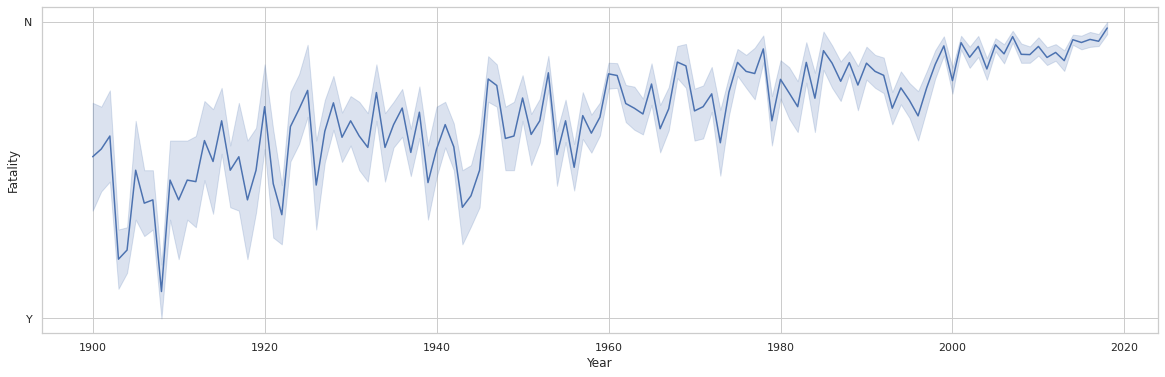

In [27]:
sns.lineplot(data=df, x=df.Year, y=df.Fatality, ci=68)

In [28]:
dict(df.value_counts("Sex"))

{'M': 4098, 'F': 544, 'M ': 2, 'lli': 1, 'N': 1, '.': 1}

In [29]:
df["Sex"] = df["Sex"].replace(["M ", "lli"], "M")
df["Sex"] = df["Sex"].replace(["N"], "F")
df["Sex"] = df["Sex"].replace(["."], "F")

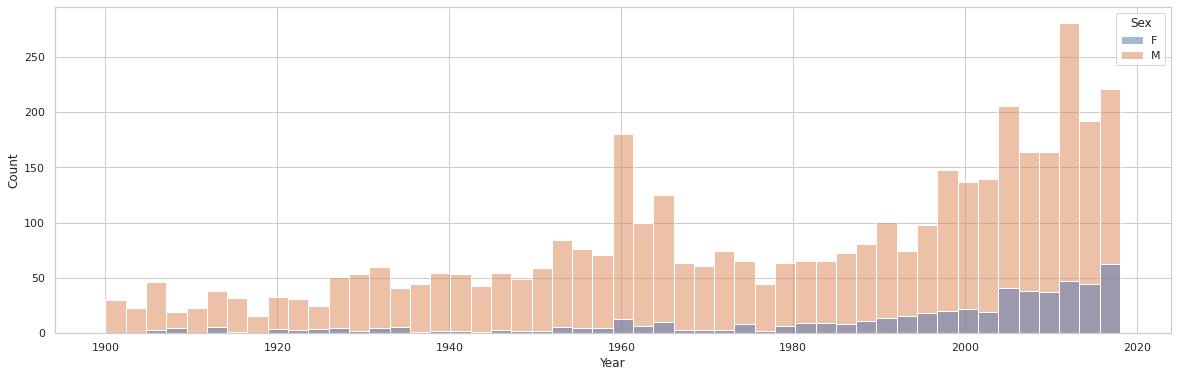

In [30]:
sns.histplot(data=df, x="Year", hue="Sex",bins=50);

What happen in the 50´s for higher rate of people being attached?

Is it the rate of women being attacked due to a principal activity?

<AxesSubplot:xlabel='Year', ylabel='Density'>

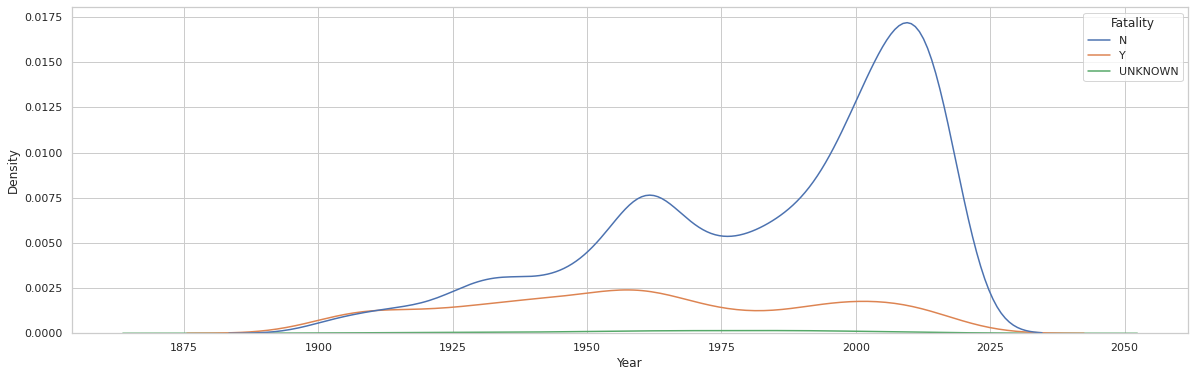

In [50]:
sns.kdeplot(data=df, x="Year", hue= "Fatality")

<AxesSubplot:xlabel='Year', ylabel='Density'>

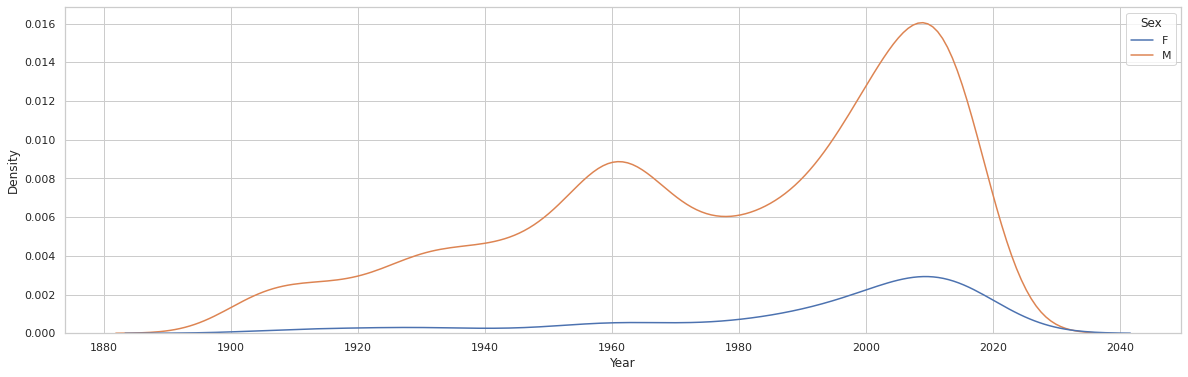

In [51]:
sns.kdeplot(data=df, x="Year", hue= "Sex")

<AxesSubplot:xlabel='Sex', ylabel='Year'>

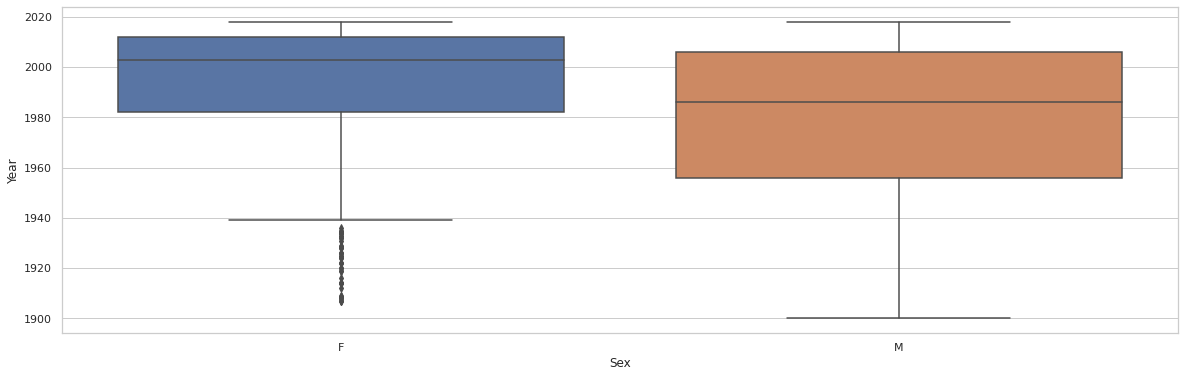

In [43]:
sns.boxplot(data=df, x="Sex", y="Year")